#**Retriving stock data from Yahoo Finance**

In [1]:
import yfinance as yf

def fetch_stock_data(ticker, period="5d", interval="1m"):
    # Fetch data
    data = yf.download(ticker, period=period, interval=interval)

    # Save to CSV
    csv_file = f"{ticker}_data.csv"
    data.to_csv(csv_file)

    return f"Data saved to {csv_file}"

# To use the function, you would call:
fetch_stock_data("GME")


[*********************100%%**********************]  1 of 1 completed


'Data saved to GME_data.csv'

In [2]:
import pandas as pd

#Loading in the dataset
df = pd.read_csv('GME_data.csv')
df.head(), df.describe(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1813 entries, 0 to 1812
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Datetime   1813 non-null   object 
 1   Open       1813 non-null   float64
 2   High       1813 non-null   float64
 3   Low        1813 non-null   float64
 4   Close      1813 non-null   float64
 5   Adj Close  1813 non-null   float64
 6   Volume     1813 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 99.3+ KB


(                    Datetime       Open       High    Low      Close  \
 0  2024-05-13 09:30:00-04:00  26.340000  26.360001  25.27  25.270000   
 1  2024-05-13 09:31:00-04:00  25.270000  26.000000  25.27  25.860001   
 2  2024-05-13 09:32:00-04:00  25.879999  26.000000  25.02  25.070000   
 3  2024-05-13 09:33:00-04:00  25.070000  25.660000  24.77  25.629999   
 4  2024-05-13 09:34:00-04:00  25.570000  25.990000  25.51  25.924999   
 
    Adj Close    Volume  
 0  25.270000  17453085  
 1  25.860001   1597830  
 2  25.070000   1252617  
 3  25.629999   1455576  
 4  25.924999    983005  ,
               Open         High          Low        Close    Adj Close  \
 count  1813.000000  1813.000000  1813.000000  1813.000000  1813.000000   
 mean     32.552344    32.822271    32.273579    32.547565    32.547565   
 std       8.993675     9.149056     8.814741     8.978186     8.978186   
 min      19.790001    20.150000    19.700001    19.809900    19.809900   
 25%      28.735001    28.95

# **Data Overview**

After loading in the dataset for GameStop stock prices data by the minute containing 1816 entries (could change if you use this notebook after a certain time period).

Columns which are included in this dataset:
*   DateTime: The date and time of the stock data
*   Open: The starting price of the stock at that beginning minute.
*   High: The highest price of the stock during the minute.
*   Low: The lowest price of the stock during the minute.
*   Close: The closing price of the stock at the end of the minute.
*   Adj Close:The adjusted closing price of the stock.
*   Volume: The volume of stock traded during the minute.









# **Summary Statistics**

*   **Open, High, Low, Close, Adj Close:**
  *   It has a range of approximately between 19.8 (1 decimal place) and 64.8 (1 decimal place).
  *   Mean prices range from 32.2 (1 decimal place) to 32.5 (1 decimal place)

*   **Volume**:
  *   Ranges from 1,240 to 48,123,980
  *   Has an average volume of 364,401.





# **Data Quality Check**

In [3]:
df.isnull().any()

Datetime     False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

There appears to be no missing (null) values contained within the dataset.

The 'Datetime' column I will need to convert into datetime type in order to perform any time series analysis.

# **Converting Datetime column into the correct datatype**

In [4]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1813 entries, 0 to 1812
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype                    
---  ------     --------------  -----                    
 0   Datetime   1813 non-null   datetime64[ns, UTC-04:00]
 1   Open       1813 non-null   float64                  
 2   High       1813 non-null   float64                  
 3   Low        1813 non-null   float64                  
 4   Close      1813 non-null   float64                  
 5   Adj Close  1813 non-null   float64                  
 6   Volume     1813 non-null   int64                    
dtypes: datetime64[ns, UTC-04:00](1), float64(5), int64(1)
memory usage: 99.3 KB


(None,
                    Datetime       Open       High    Low      Close  \
 0 2024-05-13 09:30:00-04:00  26.340000  26.360001  25.27  25.270000   
 1 2024-05-13 09:31:00-04:00  25.270000  26.000000  25.27  25.860001   
 2 2024-05-13 09:32:00-04:00  25.879999  26.000000  25.02  25.070000   
 3 2024-05-13 09:33:00-04:00  25.070000  25.660000  24.77  25.629999   
 4 2024-05-13 09:34:00-04:00  25.570000  25.990000  25.51  25.924999   
 
    Adj Close    Volume  
 0  25.270000  17453085  
 1  25.860001   1597830  
 2  25.070000   1252617  
 3  25.629999   1455576  
 4  25.924999    983005  )

Now that the 'Datetime' column has been converted to the correct datatype. We can proceed with the data vizualizations

# **Data visualization**

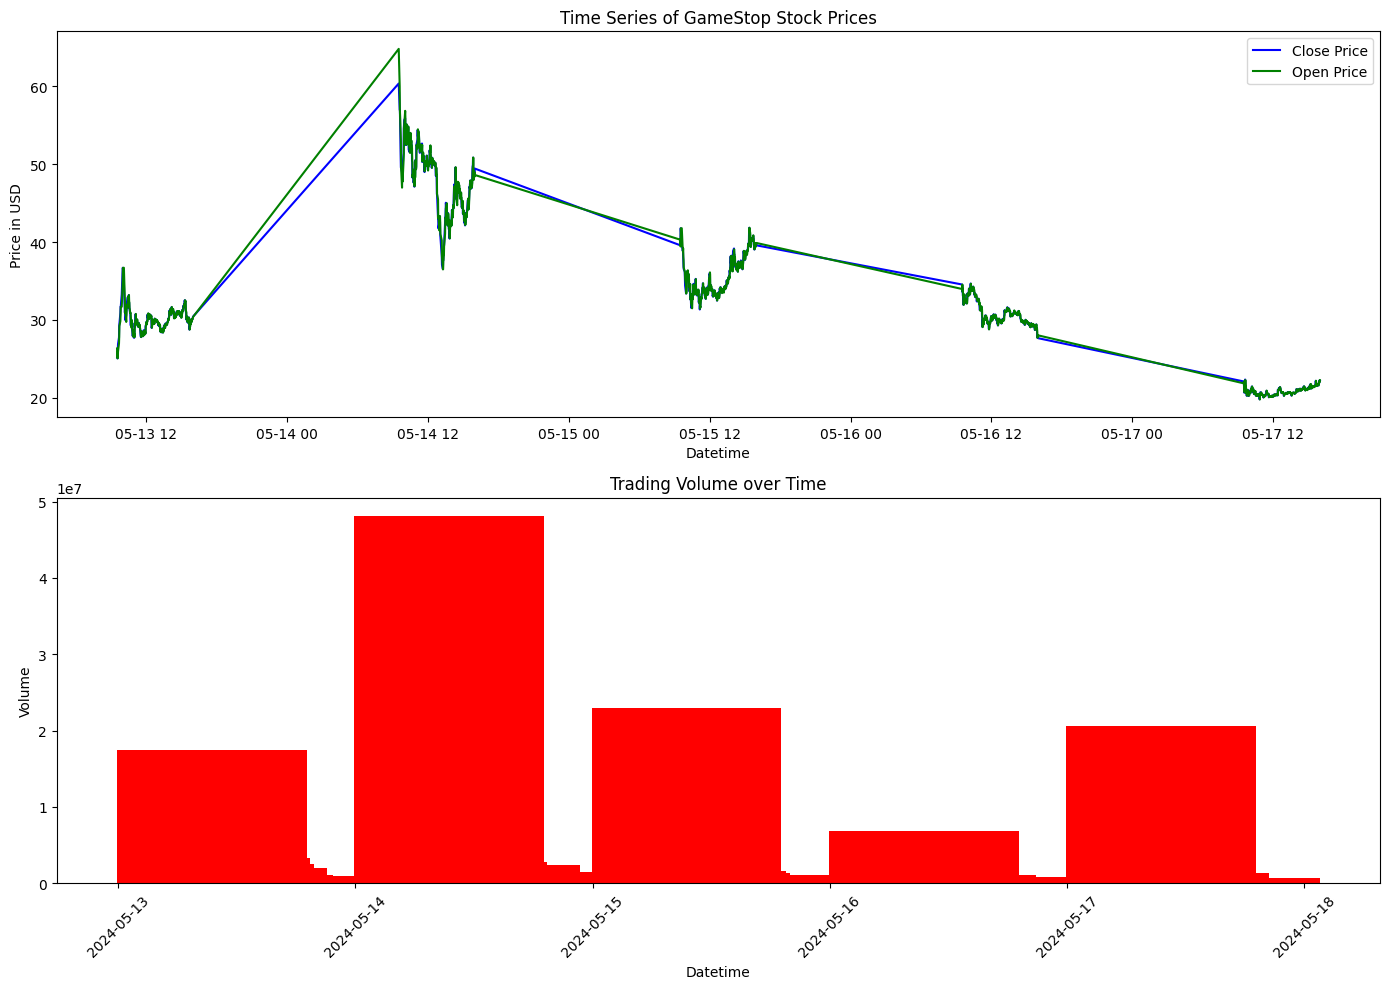

In [5]:
import matplotlib.pyplot as plt

# Plotting time series data for stock prices and volume
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plotting the stock prices
ax1.plot(df['Datetime'], df['Close'], label='Close Price', color='blue')
ax1.plot(df['Datetime'], df['Open'], label='Open Price', color='green')
ax1.set_title('Time Series of GameStop Stock Prices')
ax1.set_xlabel('Datetime')
ax1.set_ylabel('Price in USD')
ax1.legend()

# Plotting the trading volume
ax2.bar(df['Datetime'], df['Volume'], color='Red')
ax2.set_title('Trading Volume over Time')
ax2.set_xlabel('Datetime')
ax2.set_ylabel('Volume')
ax2.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()

1.   Time Series of GameStop Stock Price:
  *   The first graph shows a time series of the opening and closing stock prices. Since there are fluctuations over time, which can be due to volatility or trading opportunities.
2.   Trading Volume over Time:
  *   Shows the trading volume. The spikes in volume could correlate with the significant price changes or external market events.



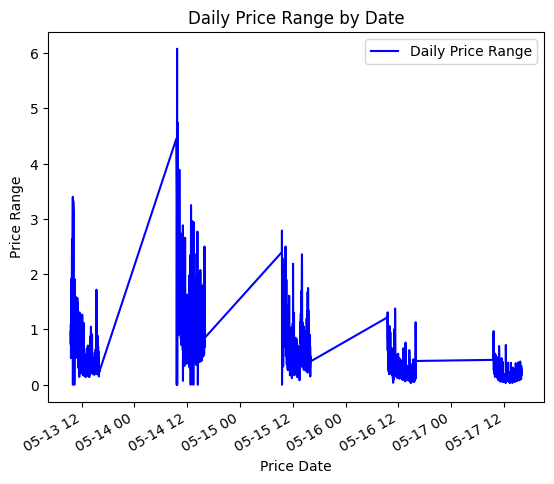

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has been loaded correctly
price_date = df['Datetime']

# Calculate the price range for each day
price_range = df['High'] - df['Low']

# Plotting the timeseries graph of the price range
plt.plot(price_date, price_range, color='blue', label='Daily Price Range')

# Giving title to the graph
plt.title('Daily Price Range by Date')

# Rotating the x-axis tick labels at 30 degrees to the right
plt.xticks(rotation=30, ha='right')

# Giving x and y label to the graph
plt.xlabel('Price Date')
plt.ylabel('Price Range')

# Adding a legend
plt.legend()

# Show the plot
plt.show()


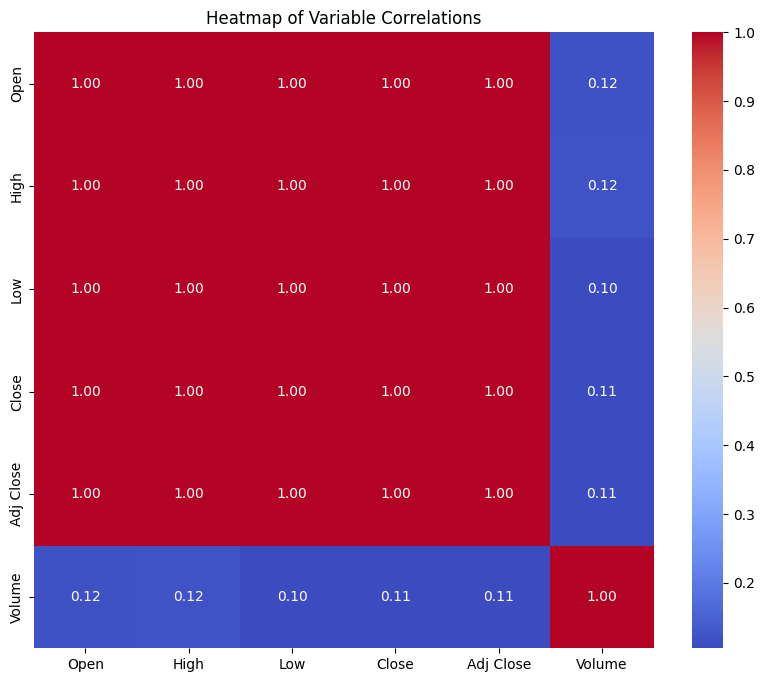

In [7]:
import seaborn as sns

# First, let's ensure the datetime is set as the index for heatmap compatibility
df.set_index('Datetime', inplace=True)

# Create a heatmap for all variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Variable Correlations')
plt.show()
